In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import tensorflow as tf
import os
import zipfile

DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/learning-datasets/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


--2023-07-12 23:23:30--  https://storage.googleapis.com/learning-datasets/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  2.17MB/s    in 1.2s    

2023-07-12 23:23:32 (2.17 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        "/tmp/h-or-s",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [5]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/15
8/8 [==============================] - 11s 19ms/step - loss: 1.4282 - accuracy: 0.6250
Epoch 2/15
8/8 [==============================] - 0s 19ms/step - loss: 0.5510 - accuracy: 0.7125
Epoch 3/15
8/8 [==============================] - 0s 19ms/step - loss: 0.3331 - accuracy: 0.9000
Epoch 4/15
8/8 [==============================] - 0s 20ms/step - loss: 0.1995 - accuracy: 0.9250
Epoch 5/15
8/8 [==============================] - 0s 19ms/step - loss: 0.2023 - accuracy: 0.8875
Epoch 6/15
8/8 [==============================] - 0s 18ms/step - loss: 0.1245 - accuracy: 0.9500
Epoch 7/15
8/8 [==============================] - 0s 21ms/step - loss: 0.2018 - accuracy: 0.9125
Epoch 8/15
8/8 [==============================] - 0s 20ms/step - loss: 0.1002 - accuracy: 0.9750
Epoch 9/15
8/8 [==============================] - 0s 19ms/step - loss: 0.0602 - accuracy: 0.9875
Epoch 10/15
8/8 [==============================] - 0s 18ms/step - loss: 0.0787 - accuracy: 0.9750
Epoch 11/15
8/8 [===========

In [12]:
d = history.history

In [13]:
d

{'loss': [1.428179144859314,
  0.5510109066963196,
  0.3330835700035095,
  0.19951960444450378,
  0.20225973427295685,
  0.12452147901058197,
  0.20181450247764587,
  0.10019918531179428,
  0.06024008244276047,
  0.0787234753370285,
  0.15704229474067688,
  0.05099276825785637,
  0.039083290845155716,
  0.010551095008850098],
 'accuracy': [0.625,
  0.7124999761581421,
  0.8999999761581421,
  0.925000011920929,
  0.887499988079071,
  0.949999988079071,
  0.9125000238418579,
  0.9750000238418579,
  0.987500011920929,
  0.9750000238418579,
  0.9125000238418579,
  0.987500011920929,
  0.987500011920929,
  1.0]}

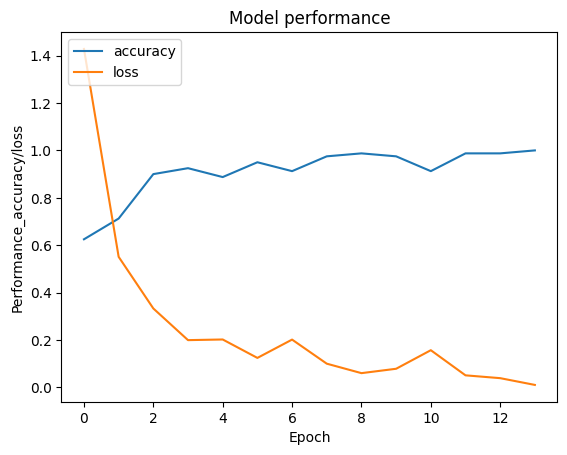

In [17]:

plt.plot(d['accuracy'])
plt.plot(d['loss'])
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance_accuracy/loss')
plt.legend(['accuracy', 'loss'], loc="upper left")



